In [1]:
from sklearn.datasets import load_boston
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import scipy.stats
import matplotlib.pyplot as plt

In [2]:
bos = load_boston()
bos.keys()

/Users/atulramkrishnan/miniforge3/envs/pytorch_nightly/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets 

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [3]:
df = pd.DataFrame(bos.data)
df.columns = bos.feature_names
df['Price'] = bos.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
data = df
data = data.apply(
    lambda x: (x - np.min(x)) / (np.max(x) - np.min(x))
)

In [5]:
# data = df[df.columns[:-1]]
# data = data.apply(
#     lambda x: (x - x.mean()) / x.std()
# )

# data['Price'] = df.Price

In [6]:

X = data.drop('Price', axis=1).to_numpy()
Y = data['Price'].to_numpy()

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(354, 13)
(152, 13)
(354,)
(152,)


In [8]:
n_train = X_train.shape[0]
X_train = torch.tensor(X_train, dtype=torch.float64)
X_test = torch.tensor(X_test, dtype=torch.float64)
Y_train = torch.tensor(Y_train, dtype=torch.float64).view(-1, 1)
Y_test = torch.tensor(Y_test, dtype=torch.float64).view(-1, 1)

In [9]:
class Model(nn.Module):
    def __init__(self, n_inputs):
        super(Model, self).__init__()
        self.linear1 = nn.Linear(n_inputs, 5, dtype=torch.float64)
        self.linear2 = nn.Linear(5, 1, dtype=torch.float64)

    def forward(self, x):
        x = F.relu(self.linear1(x))
        x = self.linear2(x)
        
        return x

In [10]:
datasets = torch.utils.data.TensorDataset(X_train, Y_train)
train_loader = torch.utils.data.DataLoader(datasets, batch_size=32, shuffle=False)

In [11]:
criterion = torch.nn.MSELoss()

In [23]:
model = Model(X_train.shape[1])

In [24]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [25]:
num_epochs = 70
for epoch in range(num_epochs):
    for x, y in train_loader:
        output = model(x)
        # print(y, output)
        loss = criterion(output, y)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print("epoch {} loss: {:.4f}".format(epoch + 1, loss.item()))

epoch 1 loss: 0.0128
epoch 2 loss: 0.0178
epoch 3 loss: 0.0186
epoch 4 loss: 0.0169
epoch 5 loss: 0.0155
epoch 6 loss: 0.0150
epoch 7 loss: 0.0142
epoch 8 loss: 0.0131
epoch 9 loss: 0.0118
epoch 10 loss: 0.0106
epoch 11 loss: 0.0093
epoch 12 loss: 0.0081
epoch 13 loss: 0.0071
epoch 14 loss: 0.0061
epoch 15 loss: 0.0050
epoch 16 loss: 0.0041
epoch 17 loss: 0.0033
epoch 18 loss: 0.0025
epoch 19 loss: 0.0020
epoch 20 loss: 0.0019
epoch 21 loss: 0.0019
epoch 22 loss: 0.0014
epoch 23 loss: 0.0006
epoch 24 loss: 0.0004
epoch 25 loss: 0.0002
epoch 26 loss: 0.0001
epoch 27 loss: 0.0001
epoch 28 loss: 0.0001
epoch 29 loss: 0.0000
epoch 30 loss: 0.0000
epoch 31 loss: 0.0000
epoch 32 loss: 0.0000
epoch 33 loss: 0.0001
epoch 34 loss: 0.0001
epoch 35 loss: 0.0001
epoch 36 loss: 0.0001
epoch 37 loss: 0.0001
epoch 38 loss: 0.0001
epoch 39 loss: 0.0001
epoch 40 loss: 0.0001
epoch 41 loss: 0.0001
epoch 42 loss: 0.0001
epoch 43 loss: 0.0002
epoch 44 loss: 0.0002
epoch 45 loss: 0.0001
epoch 46 loss: 0.00

In [39]:
example_id = 0

pred = model(X_test[example_id])
target = Y_test[example_id]

print(f"pred:{pred.item()} target:{target.item()}")
print("NLL Loss: ", criterion(pred, target).item())
print("MSE Loss: ", F.mse_loss(pred, target).item())

pred:0.5173925007029796 target:0.4133333333333334
NLL Loss:  0.010828310313664043
MSE Loss:  0.010828310313664043


In [27]:
def el(x):
    return torch.nn.functional.elu(x) + 1

In [28]:
def mean_squared_error(alpha, beta, target):
    # print(alpha.shape, beta.shape, target.shape)
    output = alpha / (alpha + beta)
    return F.mse_loss(output, target).item()

In [29]:
class ModelBeta(nn.Module):
    def __init__(self, n_inputs):
        super(ModelBeta, self).__init__()
        self.linear1 = nn.Linear(n_inputs, 5, dtype=torch.float64)
        self.linear2 = nn.Linear(5, 2, dtype=torch.float64)

    def forward(self, x):
        x = F.relu(self.linear1(x))
        x = el(self.linear2(x))
        
        return x[:, 0], x[:, 1]

In [30]:
EPS = torch.finfo(torch.float64).eps

In [31]:
def criterion_beta(z, alpha, beta):
    z = torch.clamp(z, min=EPS, max=1-EPS)
    return  -((alpha - 1) * torch.log(z) + \
            (beta - 1) * torch.log(1 - z) + \
            torch.lgamma(alpha + beta) - \
            torch.lgamma(alpha) - \
            torch.lgamma(beta)).mean()

In [32]:
model_beta = ModelBeta(X_train.shape[1])

In [33]:
optimizer = torch.optim.SGD(model_beta.parameters(), lr=0.01)

In [34]:
num_epochs = 100
for epoch in range(num_epochs):
    for i, (x, y) in enumerate(train_loader):
        y = torch.squeeze(y)
        # print(y.shape)
        alpha, beta = model_beta(x)
        # print(y, alpha, beta)
        loss = criterion_beta(y, alpha, beta)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if i == 0:
            print("epoch {} loss: {:.4f}".format(epoch + 1, loss.item()))
            print("MSE:", mean_squared_error(alpha, beta, y))

epoch 1 loss: -0.1666
MSE: 0.040318007958882185
epoch 2 loss: -0.0938
MSE: 0.045566105648728844
epoch 3 loss: -0.0480
MSE: 0.05082712038282298
epoch 4 loss: -0.0264
MSE: 0.05461265406005078
epoch 5 loss: -0.0198
MSE: 0.057074195038766595
epoch 6 loss: -0.0214
MSE: 0.05858493126150566
epoch 7 loss: -0.0273
MSE: 0.05945279980210311
epoch 8 loss: -0.0345
MSE: 0.059891232126836655
epoch 9 loss: -0.0471
MSE: 0.06001050415673397
epoch 10 loss: -0.0624
MSE: 0.05992143650689502
epoch 11 loss: -0.0757
MSE: 0.05971420191165736
epoch 12 loss: -0.0882
MSE: 0.059437775322190495
epoch 13 loss: -0.0983
MSE: 0.059136611231830984
epoch 14 loss: -0.1070
MSE: 0.058810638743190126
epoch 15 loss: -0.1148
MSE: 0.05845730871714229
epoch 16 loss: -0.1218
MSE: 0.05808105372208468
epoch 17 loss: -0.1281
MSE: 0.0576534464032725
epoch 18 loss: -0.1340
MSE: 0.057200491126334144
epoch 19 loss: -0.1396
MSE: 0.05672397807321341
epoch 20 loss: -0.1450
MSE: 0.056218302695264774
epoch 21 loss: -0.1503
MSE: 0.05568492187

In [37]:
example_id = 0
test_data = X_test[example_id]
test_target = Y_test[example_id]
a, b = model_beta(test_data.unsqueeze(0))

print("alpha:", a.item(), "| beta:", b.item())
print("Target:", test_target.item(), "| Predicted(using mean): ", (a / (a+b)).item())
print("NLL Loss:", criterion_beta(test_target,a , b).item())
print("MSE Loss:", mean_squared_error(a, b, test_target))

alpha: 0.9989341538834511 | beta: 0.6422511912861625
Target: 0.4133333333333334 | Predicted(using mean):  0.6086662647966876
NLL Loss: 0.2518352532216729
MSE Loss: 0.03815495411406744


/Users/atulramkrishnan/miniforge3/envs/pytorch_nightly/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


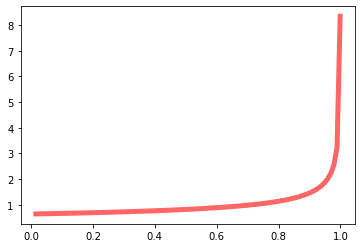

In [38]:
a = a.detach().numpy()
b = b.detach().numpy()
x = np.linspace(scipy.stats.beta.ppf(0.01, a, b),
                scipy.stats.beta.ppf(0.99, a, b), 100)

plt.plot(x, scipy.stats.beta.pdf(x, a, b),
       'r-', lw=5, alpha=0.6, label='beta pdf')